In [1]:
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Read PubMed EDirect Outputs

In [ ]:
file_path = "./pubmed/pmid_contents_v5.txt"

df = pd.read_csv(file_path, sep='^')
df.columns = ['PMID', 'PubDate/Year', 'Journal/Title', 'ArticleTitle', 'AbstractText', 'doi']

In [3]:
df.shape

(4999, 6)

In [4]:
df.head()

,PMID,PubDate/Year,Journal/Title,ArticleTitle,AbstractText,doi
0,7472468,1995.0,The Journal of neuroscience : the official jou...,Basic fibroblast growth factor increases divis...,Growth factors have been shown to be involved ...,10.1523/JNEUROSCI.15-11-07141.1995
1,7473348,1995.0,Journal of radiation research,"Effect of antihistamines, disodium cromoglycat...",Exposure to ionizing radiation causes hypotens...,10.1269/jrr.36.77
2,7473807,1995.0,Journal of neurotrauma,A new model for rapid stretch-induced injury o...,The purpose of this study was to develop a sim...,10.1089/neu.1995.12.325
3,7475922,1995.0,Life sciences,Antagonizing effects of VA-045 on reduced acti...,"Based on the finding that VA-045, a novel apov...",10.1016/0024-3205(95)02158-f
4,7477741,1995.0,Neurological research,Diffusion weighted imaging for acute cerebral ...,The diagnosis of acute cerebral ischemia remai...,10.1080/01616412.1995.11740325


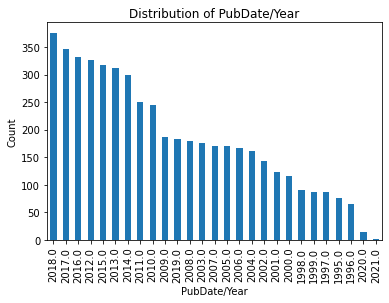

In [5]:
# Plot the distribution of values in PubDate/Year
df['PubDate/Year'].value_counts().plot(kind='bar')
plt.xlabel('PubDate/Year')
plt.ylabel('Count')
plt.title('Distribution of PubDate/Year')
plt.show()


In [6]:
df_cleaned = df.dropna(subset=['AbstractText'])

In [7]:
df_cleaned.shape

(4861, 6)

In [8]:
# Fill NaN values with an empty string
df_cleaned = df_cleaned.fillna('')
df_cleaned['AbstractText'] = df_cleaned['AbstractText'].str.replace('"', "\'")
df_cleaned['ArticleTitle'] = df_cleaned['ArticleTitle'].str.replace('"', "\'")

# Concatenate the desired columns with ^ separator
df_cleaned['text'] = df_cleaned[['Journal/Title', 'ArticleTitle', 'AbstractText']].apply(lambda x: '^\\n'.join(map(str, x)), axis=1)

# Create a new DataFrame with only the required columns
result_df = df_cleaned[['PMID', 'text']]
result_df.to_csv("./prodigy/input/all_{}_pubmed_with_abstracts.csv".format(len(result_df)))

### Prepare in JSONL format for Prodigy

In [10]:
# Set a seed for reproducibility
np.random.seed(42)

# Randomly sample 2000 rows
sampled_df = result_df.sample(n=2000)

# Split into two DataFrames
pilot_df = sampled_df.head(500)
postpilot_df = sampled_df.tail(1500)

# Convert the DataFrames to JSONL format
pilot_jsonl_data = pilot_df.to_dict(orient='records')
postpilot_jsonl_data = postpilot_df.to_dict(orient='records')

# Save the sampled data to JSONL files
with open('./prodigy/input/pilot_500_pubmed_abstracts.jsonl', 'w') as pilot_file:
    for line in pilot_jsonl_data:
        pilot_file.write(f'{{"pmid": "{line["PMID"]}", "text": "{line["text"]}"}}\n')

with open('./prodigy/input/postpilot_1500_pubmed_abstracts.jsonl', 'w') as postpilot_file:
    for line in postpilot_jsonl_data:
        postpilot_file.write(f'{{"pmid": "{line["PMID"]}", "text": "{line["text"]}"}}\n')


In [11]:
# Convert the DataFrame to JSONL format
jsonl_data = result_df.to_dict(orient='records')

# Save the JSONL data to a file
with open('./prodigy/pubmed_abstracts.jsonl', 'w') as jsonl_file:
    for line in jsonl_data:
        jsonl_file.write(f'{{"pmid": "{line["PMID"]}", "text": "{line["text"]}"}}\n')

In [12]:
result_df

,PMID,text
0,7472468,The Journal of neuroscience : the official jou...
1,7473348,Journal of radiation research^\nEffect of anti...
2,7473807,Journal of neurotrauma^\nA new model for rapid...
3,7475922,Life sciences^\nAntagonizing effects of VA-045...
4,7477741,Neurological research^\nDiffusion weighted ima...
...,...,...
4994,31429777,Journal of neuroinflammation^\nLysophosphatidi...
4995,31439642,Diabetes^\nSarm1 Gene Deficiency Attenuates Di...
4996,31444473,Molecular psychiatry^\nThree-dimensional model...
4997,31523119,Molecular vision^\nTherapeutic efficacy of mes...
